<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# Algoritmo de Simon

In [1]:
# initialisation
import numpy as np
import math, cmath

# Importing standard Qiskit libraries
from qiskit.providers.aer import Aer, AerSimulator
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute, QuantumRegister, ClassicalRegister
from qiskit.providers.ibmq import least_busy, IBMQBackend
from qiskit.tools.jupyter import *

# basic plot tools
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import array_to_latex

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()


/tmp/ipykernel_4431/3216726559.py:17: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


# ORACULOS

En el algoritmo de Simon tenemos una funcion de Oráculo desconocida $f$, que se garantiza que será uno a uno ($1:1$) o dos a uno ($2:1$), donde __uno-a-uno__ y __dos-a-uno__, significa que la funcion tiene las siguientes propiedades:

- **uno-a-uno**: asigna exactamente una salida única para cada entrada. Un ejemplo con una función que toma 4 entradas es:

$$f(1) \rightarrow 1, \quad f(2) \rightarrow 2, \quad f(3) \rightarrow 3, \quad f(4) \rightarrow 4$$

- **dos-a-uno**: asigna exactamente dos entradas a cada salida única. Un ejemplo con una función que toma 4 entradas es:

$$f(1) \rightarrow 1, \quad f(2) \rightarrow 2, \quad f(3) \rightarrow 1, \quad f(4) \rightarrow 2$$

Y donde el mapeo dos-a-uno se realiza según una cadena de bits oculta, $s$, donde:

$$
\textrm{dado }x_1,x_2: \quad f(x_1) = f(x_2) \\
\textrm{está garantizado }: \quad x_1 \oplus x_2 = s
$$

Y resulta que ambos casos se reducen al mismo problema de encontrar $s$, donde una cadena de bits de $s={000...}$ representa el $f$ uno a uno.

Podemos crear una __funcion de oráculo__ para n qubits que codifique una funcion binaria de este tipo.

#### EJERCICIO

Escribe una funcion que tome dos cadenas de bits $x1$ y $x2$ devuelva la cadena $s$ que cumple $x_1 \oplus x_2 = s$


In [2]:
def xor_bitstrings(bitstring1, bitstring2):
    ''' 
    inputs are two strings of length n bits
    output one string of n bits with bitstring1 XOR bitstring2 operation
    '''
    xor = ""
    for ind in range(len(bitstring1)):
        if bitstring1[ind] + bitstring2[ind] in ["00","11"]:
            xor += "0"
        else:
            xor += "1"

    return xor

In [5]:
# Example usage:
bitstring1 = "10"
bitstring2 = "01"
result = xor_bitstrings(bitstring1, bitstring2)

print(f"The XOR of {bitstring1} and {bitstring2} is: {result}")

The XOR of 10 and 01 is: 11


## Oráculo para una cadena binaria dada

### EJERCICIO

Dada la siguiente funcion binaria (2:1) de n= 2 bits:

```
x_1 x_0   f(x_1 x_0)$
0   0       0   0
0   1       1   1
1   0       1   1
1   1       0   0
```

Calcula mediante un programa la cadena $s$ que cumple que:

$$
\textrm{dado }x_1,x_2: \quad f(x_1) = f(x_2) \\
\textrm{está garantizado }: \quad x_1 \oplus x_2 = s
$$

In [6]:
# utiliza la funcion xor anterior y computa la cadena s a partir de los valores de x1 y x2 que cumplen f(x1)=f(x2)
s = xor_bitstrings("01","10")
print(s)

11


Utiliza el Composer para construir un circuito sea un Oráculo de Simon con esta cadena $s$

Ponemos los n qubits del input en superposicion y la ejecutamos para ver que es la funcion que realiza la operacion que hemos definido. Estamos ejecutando todos los valores de input posibles a la vez. 

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


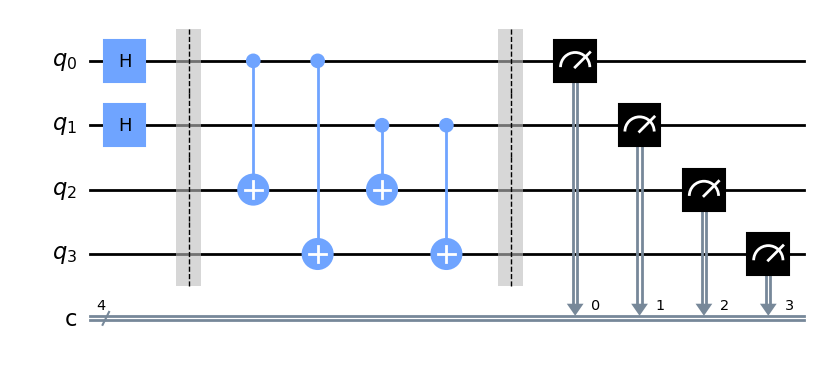

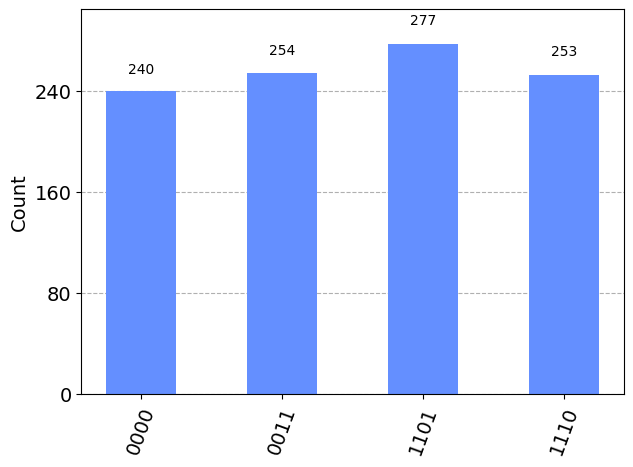

In [7]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h([qreg_q[0],qreg_q[1]])

circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.barrier()

circuit.measure(qreg_q,creg_c)

display(circuit.draw("mpl"))

backend = Aer.get_backend("aer_simulator")
transpiled_circ = transpile(circuits=circuit,backend=backend)
job = backend.run(transpiled_circ).result()

display(plot_histogram(job.get_counts()))

#### EJERCICIO

Dada una cadena de n=2 bits, construye un circuito con n qubits de entrada y n qubits de salida, que compute el resultado de la funcion (2:1) del oráculo de Simon siguiente:

```
x_1 x_0   f(x_1 x_0)$
0   0       0   0
0   1       0   1
1   0       0   0
1   1       0   1
```

Calcula mediante un programa la cadena $s$ que cumple que:

$$
\textrm{dado }x_1,x_2: \quad f(x_1) = f(x_2) \\
\textrm{está garantizado }: \quad x_1 \oplus x_2 = s
$$

In [9]:
# utiliza la funcion xor anterior y computa la cadena b a partir de los valores de x1 y x2 que cumplen f(x1)=f(x2)
s = xor_bitstrings("01","11")
print(s)

10


Utiliza el Composer para construir un circuito sea un Oráculo de Simon con esta cadena $s$

Ponemos los n qubits del input en superposicion y la ejecutamos para ver que es la funcion que realiza la operacion que hemos definado. Estamos ejecutando todas los valores de input posibles a la vez. 

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


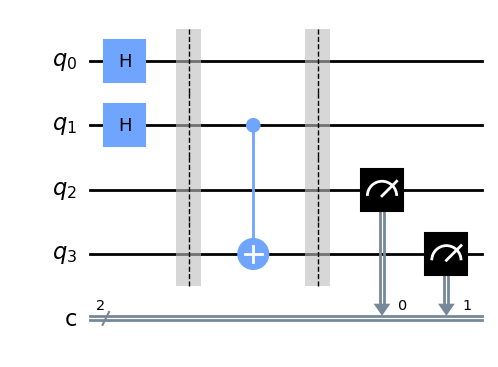

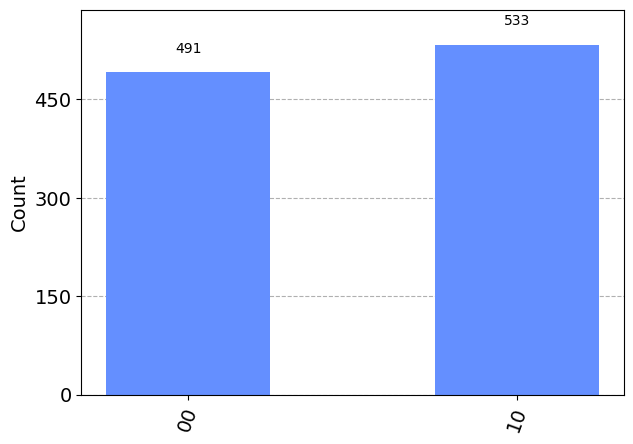

In [10]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h([qreg_q[0],qreg_q[1]])

circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.barrier()

circuit.measure([qreg_q[2],qreg_q[3]],creg_c)

display(circuit.draw("mpl"))

backend = Aer.get_backend("aer_simulator")
transpiled_circ = transpile(circuits=circuit,backend=backend)
job = backend.run(transpiled_circ).result()

display(plot_histogram(job.get_counts()))

## Creacion de un oraculo aleatorio

Creamos una funcion de oráculo para un numero de bits n que genera una cadena binaria aleatoria y devuelve un circuito que computa una funcion (2:1) que es un Oraculo de Simon caracterizado por esta cadena

In [11]:
### HACEMOS LA FUNCOIN DEL ORACULO

def simon_oracle(n):
    #La funcion crea un objeto de QuantumCircuit y lo devuelve
    #El circuito del oraculo tiene n qubit de entrada y uno de salida -> en total n+1 qubits

    oracle_qc = QuantumCircuit(2*n)
    #generation of string s and printing it for further comprobations
    s= ''.join([str(np.random.randint(2)) for b in range(n)])
    print('s',s[::-1]) # la cadena caracteristica es esta, puesto que se codifica en el circuito tiene orden invertido de qubits
    
    #draw a barrier before oracle
    oracle_qc.barrier()

    # copy the content of the first register to the second register
    for i in range(n):
        oracle_qc.cx(i, n+i)

    # get the least index j such that s_j is "1"
    j = -1
    for i, c in enumerate(s):
        if c == "1":
            j = i
            break

    # Creating 1-to-1 or 2-to-1 mapping with the j-th qubit of x as control to XOR the second register with s
    for i, c in enumerate(s):
        if c == "1" and j >= 0:
            oracle_qc.cx(j, n+i) #the i-th qubit is flipped if s_i is 1

    # get random permutation of n qubits
    perm = list(np.random.permutation(n))

    #initial position
    init = list(range(n))
    i = 0
    while i < n:
        if init[i] != perm[i]:
            k = perm.index(init[i])
            oracle_qc.swap(n+i, n+k) #swap qubits
            init[i], init[k] = init[k], init[i] #marked swapped qubits
        else:
            i += 1

    # randomly flip the qubit
    for i in range(n):
        if np.random.random() > 0.5:
            oracle_qc.x(n+i)

    # Apply the barrier to mark the end of the blackbox function
    oracle_qc.barrier()


    oracle_qc.name = 'Simon-Oracle' #to show in the display circuit
    return oracle_qc

#### EJERCICIO

Lo ejecutamos en superposicion para ver la salida de la funcion del oráculo

s 10


/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


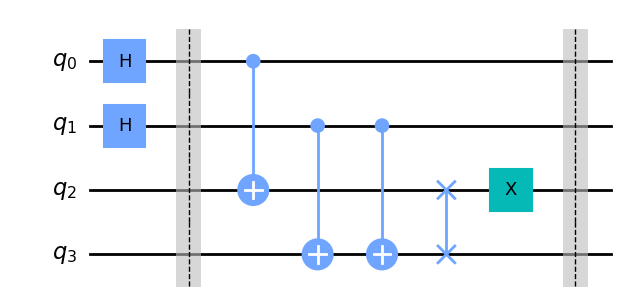

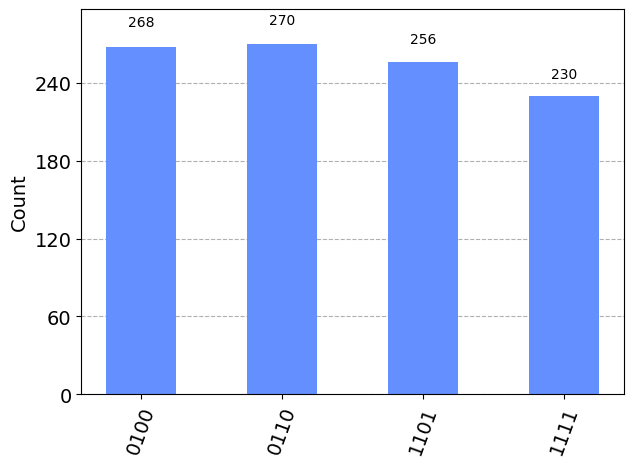

In [12]:
n = 2
circuit = QuantumCircuit(2*n)
circuit.h(range(n))

circuit.compose(simon_oracle(n),inplace=True)

display(circuit.draw("mpl"))

circuit.measure_all()

backend = Aer.get_backend("aer_simulator")
transpiled_circ = transpile(circuits=circuit,backend=backend)
job = backend.run(transpiled_circ).result()

display(plot_histogram(job.get_counts()))

Comprobamos que las cadenas que cumplen $ x_1 \oplus x_2 = s$ son las que tienen el mismo resultado de la funcion del Oráculo

In [35]:
s = xor_bitstrings("00","11")
print(s)

11


# Ejecucion del Algoritmo de Simon

#### EJERCICIO

Construye un circuito que ejecute el algoritmo de Simon para un Oraculo aleatorio.

Ejecutalo y obten los resultados de las medidas para determinar la cadena s del Oraculo en un proceso posterior de postprocesado.

s 101


/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


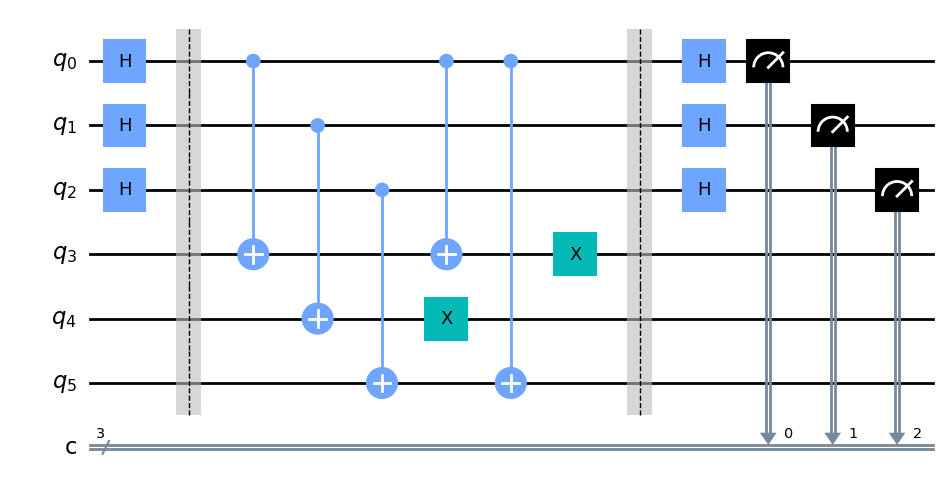

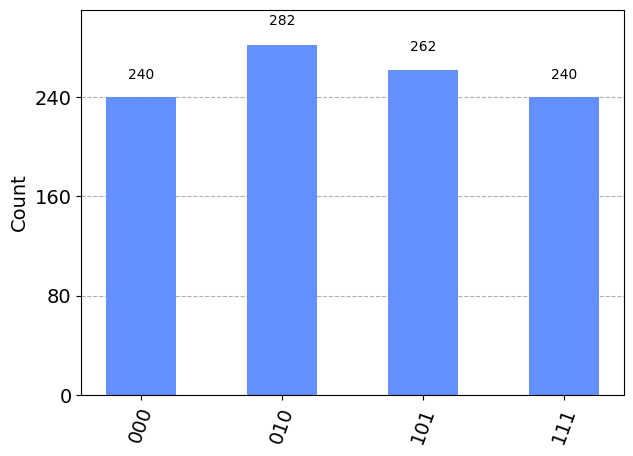

In [38]:
#Creamos un circuito de 2n qubits
n=3
circuit = QuantumCircuit(2*n,n)

#ponemos los qubits de entrada en superposicion
circuit.h(range(n))

# Le añadimos el oráculo con funcion aleatoria
circuit.compose(simon_oracle(n),inplace=True)
#circuit.measure(range(n,2*n),range(n))
#circuit.barrier()

#le añadimos las puertas de Hadamard finales
circuit.h(range(n))

#ponemos las puertas de medida
circuit.measure(range(n),range(n))
    
#Mostramos el circuito
display(circuit.draw("mpl"))

#Ejecutamos el circuito
simulador = Aer.get_backend("aer_simulator")
t_circuit = transpile(circuit,simulador)
job = simulador.run(t_circuit).result()

#mostramos histograma resultado
display(plot_histogram(job.get_counts()))


#### EJERCICIO

Realizaremos la etapa de postporcesado del algoritmo para descubrir la cadena s del Oráculo y lo haremos inicialmente con una aproximacion de fuerza bruta.

Construye las siguientes funciones binarias:

- __dot_product_modulo_2__: que tome dos bitstrings y calcule el producto escalar binario (modulo 2) de ambas

- __generate_all_bitstrings__: que tome un numero de bits y genere todos los bitstreams posibles para ese numero de bits dado


Y utilizalas para recorrer todas las posibles cadenas s y encontrar aquellas que cumplen $ s.x mod 2 = 0 $ para todas las cadenas $x$ medidas en la salida del circuito del algoritmo de Simon anterior


In [39]:
def dot_product_modulo_2(bitstring1, bitstring2):
    result = 0
    for ind in range(len(bitstring1)):
        result = result ^ (int(bitstring1[ind])*int(bitstring2[ind]))
    return result

In [40]:
# Example usage:
bitstring1 = "1101100111"
bitstring2 = "1010001110"
result = dot_product_modulo_2(bitstring1, bitstring2)

print(f"The dot product modulo 2 of {bitstring1} and {bitstring2} is: {result}")

The dot product modulo 2 of 1101100111 and 1010001110 is: 1


In [41]:
def generate_all_bitstrings(length):
    all_bitstrings = [format(i, '0' + str(length) + 'b') for i in range(2**length)]
    return all_bitstrings

In [42]:
# Example usage:
# Set the length of the bitstrings
bitstring_length = 3

# Generate all possible bitstrings of 3 bits
all_bitstrings = generate_all_bitstrings(bitstring_length)

# Print the result
print("All possible bitstrings of length", bitstring_length, ":")
for bitstring in all_bitstrings:
    print(bitstring)

All possible bitstrings of length 3 :
000
001
010
011
100
101
110
111


In [43]:
#calcula todos los valores bitstrings obtenidos con el circuito del algoritmo de Simon son
valores_resultado_simon=job.get_counts().keys()
print(valores_resultado_simon)

dict_keys(['101', '000', '010', '111'])


In [44]:
#Tenemos la cadena del Oráculo, que copiamos aqui para cerciorarnos de que encontramos la misma cadena
s='010101'
#print('s',s)

#algoritmo de fuerza bruta que encuentra la cadena s
for ind in generate_all_bitstrings(n):
    for i in valores_resultado_simon:
        if dot_product_modulo_2(ind,i) == 0:
            print(dot_product_modulo_2(ind,i),ind,i)


0 000 101
0 000 000
0 000 010
0 000 111
0 001 000
0 001 010
0 010 101
0 010 000
0 011 000
0 011 111
0 100 000
0 100 010
0 101 101
0 101 000
0 101 010
0 101 111
0 110 000
0 110 111
0 111 101
0 111 000


A continuación se recoge un metodo algebraico para encontrar la cadena s que podemos utilizar tambien en lugar del metodo de fuerza bruta anterior

In [21]:
# Post-processing step
# Constructing the system of linear equations Y s = 0
# By k[::-1], we reverse the order of the bitstring
lAnswer = [ (k[::-1],v) for k,v in job.get_counts().items() if k != "0"*n  ] #excluding the trivial all-zero
#Sort the basis by their probabilities
lAnswer.sort(key = lambda x: x[1], reverse=True)

Y = []
for k, v in lAnswer:
    Y.append( [ int(c) for c in k ] )


#import tools from sympy
from sympy import Matrix, pprint, MatrixSymbol, expand, mod_inverse


Y = Matrix(Y)

#pprint(Y)

#Perform Gaussian elimination on Y
Y_transformed = Y.rref(iszerofunc=lambda x: x % 2==0) # linear algebra on GF(2) 

#to convert rational and negatives in rref of linear algebra on GF(2)
def mod(x,modulus):
    numer, denom = x.as_numer_denom()
    return numer*mod_inverse(denom,modulus) % modulus

Y_new = Y_transformed[0].applyfunc(lambda x: mod(x,2)) #must takecare of negatives and fractional values
#pprint(Y_new)

print("The hidden bistring s[ 0 ], s[ 1 ]....s[",n-1,"] is the one satisfying the following system of linear equations:")
rows, cols = Y_new.shape
for r in range(rows):
    Yr = [ "s[ "+str(i)+" ]" for i, v in enumerate(list(Y_new[r,:])) if v == 1 ]
    if len(Yr) > 0:
        tStr = " + ".join(Yr)
        print(tStr, "= 0")

The hidden bistring s[ 0 ], s[ 1 ]....s[ 2 ] is the one satisfying the following system of linear equations:
s[ 1 ] = 0
s[ 2 ] = 0


# Ejecucion en un Simulador con ruido

### EJERCICIO

Ejecuta en un simulador con ruido el circuito con el algoritmo de Simon para ello:

- Creamos el circuito cuántico, que llamamos <b>simon_circuit </b>
- Preparamos un simulador con el ruido de un dispositivo real, el `ibmq_vigo`.
- Transpilamos el circuito y lo ejecutamos en el simulador
- Realizamos el postprocesado de los resultados obtenidos para encontrar la cadena s

Debido al ruido de los calculos no es sencillo ontener un calculo concluyente de la cadena s

In [ ]:
#Creamos un circuito de n qubits+1
n=3
circuit =

#PASO 1 - ponemos los qubits de entrada en superposicion


# PASO 2- Le añadimos el oráculo con funcion aleatoria


#PASO 3 - Le añadimos las puertas Hadamard



#PASO 4- ponemos las puertas de medida solo para los qubits de la entrada



#Mostramos el circuito

Preparamos un simulador con el ruido de un dispositivo real, el `ibmq_vigo`.

In [ ]:
from qiskit.providers.fake_provider import FakeVigo


# Tomamos un backend ruidoso ficticio de fake providers


# creamos el simulador


# Transpilamos el circuito para mapearlo a las puertas ruidosass


# Ejecutamos el circuito y obtenemos el resultado

Y cuando termine la ejecucion, realizamos el postprocesado y obtencion de la cadena $s$ resultado

# Ejecucion en un BackEnd cuántico real

### EJERCICIO

Ejecuta en un backend real cuantico el circuito con el algoritmo de Simon, para ello:

- Creamos el circuito cuántico, que llamamos <b>simon_circuit </b>
- Lo ejecutamos primero en el simulador para ver si funciona bien antes de enviarlo a un BackEnd cuántico real
- Buscamos el backend que este menos cargado de trabajos
- Transpilamos el circuito y lo enviamos para ejecucion
- Realizamos el postprocesado de los resultados obtenidos para encontrar la cadena s

Debido a la imperfeccion de los ordenadores reales y el ruido de los calculos no es sencillo ontener un calculo concluyente de la cadena s

In [ ]:
#Construimos el circuito

#ejecutamos en simulador para comprobar que esta ok

In [ ]:
# buscamos el backend menos ocupado - using a real qc backend: lest busy

In [ ]:
#lanzamos la ejecucion del job

Y cuando termine la ejecucion, realizamos el postprocesado y obtencion de la cadena $s$ resultado